**Предсказание возраста человека по фотографии.**

**Описание проекта**

Сетевой супермаркет «Хлеб-Соль» внедряет систему компьютерного зрения для обработки фотографий покупателей.   Фотофиксация в прикассовой зоне поможет определять возраст клиентов, чтобы:  
 - 	Анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;  
 - Контролировать добросовестность кассиров при продаже алкоголя.  
Постройте модель, которая по фотографии определит приблизительный возраст человека. В вашем распоряжении набор фотографий людей с указанием возраста.


<h1>Ход исследования<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1">Исследовательский анализ данных</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2">Обучение модели</a></span></li><li><span><a href="#Анализ-обученной-модели" data-toc-modified-id="Анализ-обученной-модели-3">Анализ обученной модели</a></span></li></ul></div>

## Исследовательский анализ данных

# Исследовательский анализ данных

# Исследовательский анализ данных

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.models import Sequential
#from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
data_labels = pd.read_csv('/datasets/faces/labels.csv')
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=data_labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


In [3]:
target = data_labels['real_age']
data_labels.shape

(7591, 2)

Проверим датасет с разметкой на пропуски и дубликаты.

In [4]:
print(data_labels.isna().sum())
data_labels.duplicated().sum()

file_name    0
real_age     0
dtype: int64


0

Пропуски и дубликаты не обнаружены.

In [5]:
data_labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [6]:
print(data_labels['real_age'].min(), data_labels['real_age'].max(), data_labels['real_age'].median(), 
     data_labels['real_age'].mean())
data_labels['real_age'].value_counts().count()

1 100 29.0 31.20115926755368


97

In [7]:
data_labels['real_age'].unique()

array([  4,  18,  80,  50,  17,  27,  24,  43,  26,  39,  51,   2,   1,
         6,   5,  40,  16,  29,  35,  25,  30,  65,  13,  28,  31,  10,
        34,  15,   8,  20,  19,  42,  23,  58,  44,   7,  21,  14,  48,
        45,  37,  22,  59,  53,   9,  41,  32,  60,  38,  54,  49,  36,
        11,  70,  52,  33,  72,  47,  46,  55,  63,  12,  56,   3,  68,
        64,  67,  62,  57,  75,  61,  69,  90,  85,  88,  73,  71,  83,
        84,  87,  66,  82,  86,  77, 100,  79,  78,  76,  94,  89,  74,
        97,  93,  81,  95,  96,  91])

В датасете из 7591 фотографий размечено 97 различных возрастов от 1 до 100 лет.

Постоим график распределения возраста в выборке.

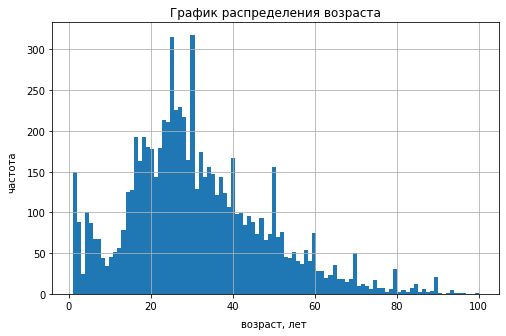

In [8]:
fig = plt.figure(figsize=(8,5))
data_labels['real_age'].hist(bins=100).set_title('График распределения возраста')
plt.text(50, -40,'возраст, лет', ha='center')
plt.text( -15, 150, 'частота', va='center', rotation='vertical')
plt.show()

Возраст людей в датасете распределён с положительной ассиметрией с длинным хвостом и перекосом вправо и несколькими пиками. Хотя для таких графиков характерна сильно смещенное среднее в правую сторону (среднее больше медианы), в нашем случае среднее равно 31,2 года, что не сильно больше медианы в 29 лет. Это объясняется двумя пиками слева в начале графика.

Выведем на экран 15 первых фотографий.

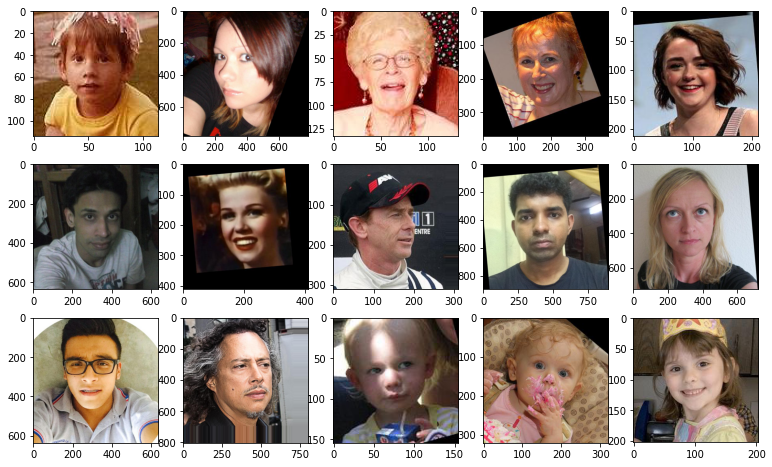

In [9]:
w = 10
h = 6
fig = plt.figure(figsize=(13,8))
columns = 5
rows = 3
for i in range(0, columns*rows):
    #img = np.random.randint(10, size=(h,w))
    if i < 10:
        link = '/datasets//faces//final_files//00000' + str(i) + '.jpg'
    else:
        link = '/datasets//faces//final_files//0000' + str(i) + '.jpg'
    img = np.array(Image.open(link))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img)
plt.show() 

Видно, что фотографии разного размера.

**Вывод**  
Датасет из 7,5 тыс размеченных цветных фотографий, целевой признак - количественный, следовательно, предстоит решить задачу регресии и создать модель, предсказывающую как можно точнее возраст человека. Т.к. размеры фотографий разные, при загрузке в train_gen_flow мы привели их к одинаковому размеру 224*224.

## Обучение модели

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AvgPool2D, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
import pandas as pd
import seaborn as sns

In [ ]:
def load_train(path): 
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
    validation_split=0.25, 
    horizontal_flip=True, 
    #vertical_flip=True,
    rescale=1./255) 

    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)
    
    return train_datagen_flow
    
    
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
    validation_split=0.25, 
    rescale=1./255)
        
    val_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory= path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)
    
    
    return val_datagen_flow


def create_model(input_shape):
    optimizer = Adam(lr=0.0001)
    backbone = ResNet50(input_shape=input_shape,
                        weights= 'imagenet', 
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    
    model.compile(loss='mean_squared_error', metrics=['mae'], optimizer=optimizer)  

    return model



def train_model(model, train_data, test_data, batch_size=None, epochs=10,
               steps_per_epoch=None, validation_steps=None):
    
    if steps_per_epoch is None:
        steps_per_epoch=len(train_data)
    if validation_steps is None:
        validation_steps=len(test_data)
    
    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

2022-10-04 11:56:31.758231: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2022-10-04 11:56:31.760129: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
2022-10-04 11:56:32.612806: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-10-04 11:56:32.622217: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-10-04 11:56:32.622281: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-10-04 11:56:32.622314: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-10-04 11:56:32.624113: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-10-04 11:56:32.624468: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-10-04 11:56:32.626487: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2022-10-04 11:56:32.627624: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2022-10-04 11:56:32.627685: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-10-04 11:56:32.631286: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2022-10-04 11:56:33.557510: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-10-04 11:56:33.567542: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2099995000 Hz
2022-10-04 11:56:33.568103: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x52d42f0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-10-04 11:56:33.568137: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-10-04 11:56:33.762088: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x51d4dd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-10-04 11:56:33.762133: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2022-10-04 11:56:33.764507: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-10-04 11:56:33.764584: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-10-04 11:56:33.764598: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-10-04 11:56:33.764633: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-10-04 11:56:33.764649: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-10-04 11:56:33.764665: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2022-10-04 11:56:33.764679: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2022-10-04 11:56:33.764783: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-10-04 11:56:33.769278: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2022-10-04 11:56:33.769357: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-10-04 11:56:34.085698: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-10-04 11:56:34.085759: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2022-10-04 11:56:34.085770: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2022-10-04 11:56:34.090361: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2022-10-04 11:56:34.090424: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10240 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
Downloading data from https://github.com/keras-team/keras-applications/releases/download/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5

    8192/94765736 [..............................] - ETA: 1s
   81920/94765736 [..............................] - ETA: 1:01
  262144/94765736 [..............................] - ETA: 39s 
  819200/94765736 [..............................] - ETA: 18s
 2392064/94765736 [..............................] - ETA: 8s 
 5693440/94765736 [>.............................] - ETA: 4s
10166272/94765736 [==>...........................] - ETA: 2s
14082048/94765736 [===>..........................] - ETA: 2s
18259968/94765736 [====>.........................] - ETA: 1s
22716416/94765736 [======>.......................] - ETA: 1s
26927104/94765736 [=======>......................] - ETA: 1s
31039488/94765736 [========>.....................] - ETA: 1s
35282944/94765736 [==========>...................] - ETA: 1s
39395328/94765736 [===========>..................] - ETA: 0s
43884544/94765736 [============>.................] - ETA: 0s
47931392/94765736 [==============>...............] - ETA: 0s
52043776/94765736 [===============>..............] - ETA: 0s
56532992/94765736 [================>.............] - ETA: 0s
60317696/94765736 [==================>...........] - ETA: 0s
64626688/94765736 [===================>..........] - ETA: 0s
69001216/94765736 [====================>.........] - ETA: 0s
72523776/94765736 [=====================>........] - ETA: 0s
77111296/94765736 [=======================>......] - ETA: 0s
81444864/94765736 [========================>.....] - ETA: 0s
84992000/94765736 [=========================>....] - ETA: 0s
89612288/94765736 [===========================>..] - ETA: 0s
93790208/94765736 [============================>.] - ETA: 0s
94773248/94765736 [==============================] - 1s 0us/step
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 60 steps
Epoch 1/10
2022-10-04 11:56:46.764555: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-10-04 11:56:47.050797: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 49s - loss: 249.8491 - mae: 11.3237 - val_loss: 832.4929 - val_mae: 23.9637
Epoch 2/10
178/178 - 40s - loss: 76.5853 - mae: 6.5946 - val_loss: 636.6835 - val_mae: 20.0543
Epoch 3/10
178/178 - 40s - loss: 49.1485 - mae: 5.3530 - val_loss: 229.3700 - val_mae: 11.3910
Epoch 4/10
178/178 - 41s - loss: 34.2852 - mae: 4.4829 - val_loss: 136.1471 - val_mae: 9.2779
Epoch 5/10
178/178 - 40s - loss: 25.1334 - mae: 3.8330 - val_loss: 92.9025 - val_mae: 7.5398
Epoch 6/10
178/178 - 40s - loss: 20.3277 - mae: 3.4454 - val_loss: 67.1265 - val_mae: 6.1596
Epoch 7/10
178/178 - 39s - loss: 17.8125 - mae: 3.2104 - val_loss: 69.8230 - val_mae: 6.2352
Epoch 8/10
178/178 - 40s - loss: 14.8623 - mae: 2.9543 - val_loss: 85.8747 - val_mae: 6.8146
Epoch 9/10
178/178 - 40s - loss: 12.5360 - mae: 2.6885 - val_loss: 71.9083 - val_mae: 6.3512
Epoch 10/10
178/178 - 40s - loss: 10.2822 - mae: 2.4392 - val_loss: 60.8872 - val_mae: 5.8105
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 10s - loss: 60.8872 - mae: 5.8105
Test MAE: 5.8105

## Анализ обученной модели

Полученный результат можно интерпритировать следующим образом:  
 - метрика на тестовой выборке mae достигла показателя в 5,8 - это значит, модель в среднем ошибается не более чем на 6 лет в определении возраста человека по фотографии.
 - время обучения каждой эпохи составило от 49 до 40 секунд.
 - если нужно улучшить качество, можно увеличить количество эпох до тех пор, пока качество не начнет снижаться.  
 
 